<div align="center"> 

# Investigating Oil prices and Big Tech. Companies Stock Market 

<p>Between 2001-1-1 - 2023-12-31</p>
</div>

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

## **1.** Problem Statement

In this reserach, the stock prices of major tech companies (such as Apple, Microsoft, Google, Amazon, and META) and oil prices over the period spanning from January 2001 to December 2023 are investigated. By examining historical data for both sectors, the aim is to uncover insights into how changes in oil prices impact the financial performance of big tech companies, and vice versa.
The datasets would include the stock market data for:
- META
- AMazon
- Google
- Apple

## **2.** Solution Pipeline
1. Gather Data
2. Asses Data
3. Clean Data
4. Store Data
5. Answering Research Questions

### Neccessary Imports

In [1]:
## Run this cell to successfully run this notebook
## !pip install yfinance

In [1]:
import requests
import pandas as pd
import yfinance as yf
import requests
import config
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Gather data

In this section, data using two different (data gathering methods) are extractand and then combined. Two different types of data-gathering methods are use:
- Programmatically downloading files
- Gathering data by accessing APIs

### **3.1.** Gathering Data Methods and Code

In this project, two types of data gathering are use: 
- Programmatically downloading files
- Gathering data by accessing APIs

Each of the datasets have at least two variables, and have greater than 500 data samples within.

#### **Dataset 1**: Oils and Petroleum dataset 

##### *About this dataset*

**Type:** JSON response

**Method:** The data was gathered using the "by accessing APIs" method from https://api.eia.gov/v2/petroleum/pri/spt/data/

**Dataset variables:**

| Column Name | Description |
|---|---|
| period |  date associated with the data point |
| duoarea | identifier for a specific geographical area |
| area-name | area name |
| product | identifier for the specific petroleum product |
| product-name | name of the product |
| process | identifier for the specific process |
| process-name | The name of the process used |
| series | identifier for the specific data series |
| series-description | descriptive text name or label for the data |

##### *Gathering by API*

In [2]:
## Gather the data using the "Gather data by accessing APIs" method from https://api.eia.gov
api_key = config.EIA_API_KEY
url = f'https://api.eia.gov/v2/petroleum/pri/spt/data/?'

params = {
    'api_key':api_key,
    'start':'2001-01-01', 
    'end':'2023-12-31'
}

response = requests.get(url, params=params)
data = response.json()
oil_data =pd.DataFrame(data['response']['data'])
oil_data.sample(5)

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description
2384,2013-05-31,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PF4,Spot Price FOB,EER_EPD2DXL0_PF4_Y35NY_DPG,New York Harbor Ultra-Low Sulfur No 2 Diesel S...
85,2014-02-14,Y35NY,NEW YORK CITY,EPD2F,No 2 Fuel Oil / Heating Oil,PF4,Spot Price FOB,EER_EPD2F_PF4_Y35NY_DPG,New York Harbor No. 2 Heating Oil Spot Price F...
3957,2008-12-19,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PF4,Spot Price FOB,EER_EPD2DXL0_PF4_Y35NY_DPG,New York Harbor Ultra-Low Sulfur No 2 Diesel S...
4099,2006-03-03,Y44MB,NA,EPLLPA,Propane,PF4,Spot Price FOB,EER_EPLLPA_PF4_Y44MB_DPG,"Mont Belvieu, TX Propane Spot Price FOB (Dolla..."
4897,2015-01-30,RGC,NA,EPJK,Kerosene-Type Jet Fuel,PF4,Spot Price FOB,EER_EPJK_PF4_RGC_DPG,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Pr...


In [3]:
oil_data.shape

(5000, 9)

> The gathered dataset have 5000 rows and 9 features.

In [4]:
oil_data.to_csv('data/oil_data_api.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

#### **Dataset 2**: Stocks Dataset

##### *About this dataset*
**Type:** Pandas.DataFrame

**Method:** The data was gathered using the "Programmatically downloading files" method from Yahoo Finance using the yfinance library

**Dataset variables:**

| Column Name | Description |
|---|---|
| Date | date associated with the data point |
| Open | The opening price of the stock on that date. |
| High | The highest price reached by the stock on that date. |
| Low | The lowest price reached by the stock on that date. |
| Close | The closing price of the stock on that date. |
| Adj Close | The adjusted closing price, adjusted for dividends and splits. |
| Volume | The number of shares traded on that date. |

##### *Gathering by Programmatically Downloading*

In [5]:
## 2nd data gathering was downloaded programitticallly from Yahoo Finance using the yfinance library
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
stocks_data = yf.download(companies, start='2001-01-01', end='2023-12-31')
stocks_data.reset_index(inplace=True)
stocks_data.sample(5)

[*********************100%%**********************]  5 of 5 completed


Price        Date   Adj Close                                                  \
Ticker                   AAPL        AMZN       GOOGL        META        MSFT   
404    2002-08-15    0.235670    0.731000         NaN         NaN   15.371591   
4298   2018-02-02   37.843075   71.497498   55.895847  189.889786   85.358849   
5144   2021-06-15  127.461487  169.156494  121.280312  336.059418  251.843948   
859    2004-06-07    0.450052    2.588000         NaN         NaN   16.470329   
1327   2006-04-17    1.956921    1.763500   10.169010         NaN   18.989025   

Price        Close                                      ...        Open  \
Ticker        AAPL        AMZN       GOOGL        META  ...        AAPL   
404       0.278750    0.731000         NaN         NaN  ...    0.272321   
4298     40.125000   71.497498   55.959999  190.279999  ...   41.500000   
5144    129.639999  169.156494  121.419502  336.750000  ...  129.940002   
859       0.532321    2.588000         NaN         NaN  ...    0.518571   
1327      2.314643    1.763500   10.180681         NaN  ...    2.375357   

Price                                                      Volume             \
Ticker        AMZN       GOOGL        META        MSFT       AAPL       AMZN   
404       0.702500         NaN         NaN   24.980000  322078400  100932000   
4298     73.869499   56.370998  192.039993   93.639999  346375200  222514000   
5144    169.199997  122.449997  336.989990  259.769989   62746300   48524000   
859       2.584500         NaN         NaN   26.020000  295876000  153760000   
1327      1.823500   10.096346         NaN   27.030001  721938000   88844000   

Price                                      
Ticker        GOOGL        META      MSFT  
404             NaN         NaN  98745600  
4298    117842000.0  26677500.0  47867800  
5144     21562000.0  15795200.0  18038900  
859             NaN         NaN  65218600  
1327    330049620.0         NaN  35796200  

[5 rows x 31 columns]

In [6]:
stocks_data.shape

(5785, 31)

> The gathered data has 5785 data points and 31 features.

In [7]:
stocks_data.to_csv('data/stock_data.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

## 4. Assess data
Now that we have gathered the datasets, let's assess the dataset for data quality and structural issues. In this section, the data is assessed according to data quality and tidiness metrics. Where two data quality issues and two tidiness issues are assessed. Each are assess visually and programmatically, then the issue is described. Justifications for the methods used for the assessment are also included.

Here's a list of the data quality attributes we covered in the course for your reference:

    **Completeness**
    **Validity**
    Accuracy
    Consistency
    Uniqueness

### Completeness (Issue #1):

#### Stocks Dataset

##### *Inspecting the dataframe visually*

To inspcet the data qaulity issue of completeness, let's visualize the ddata frame into a heatmap:

In [8]:
nan = ['NA','NaN','-', '0', np.nan] ## possible null vlaues

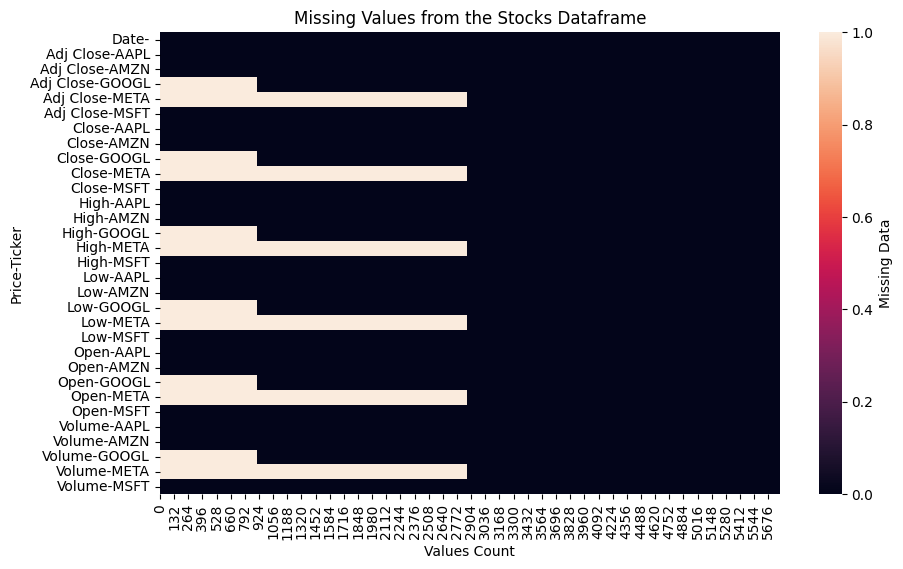

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(stocks_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values from the Stocks Dataframe')
plt.xlabel('Values Count');

> Almost half of the data from the META company are missing. The other missing values are from Google company.

##### Inspecting the dataframe programmatically

In [10]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            5785 non-null   datetime64[ns]
 1   (Adj Close, AAPL)   5785 non-null   float64       
 2   (Adj Close, AMZN)   5785 non-null   float64       
 3   (Adj Close, GOOGL)  4875 non-null   float64       
 4   (Adj Close, META)   2923 non-null   float64       
 5   (Adj Close, MSFT)   5785 non-null   float64       
 6   (Close, AAPL)       5785 non-null   float64       
 7   (Close, AMZN)       5785 non-null   float64       
 8   (Close, GOOGL)      4875 non-null   float64       
 9   (Close, META)       2923 non-null   float64       
 10  (Close, MSFT)       5785 non-null   float64       
 11  (High, AAPL)        5785 non-null   float64       
 12  (High, AMZN)        5785 non-null   float64       
 13  (High, GOOGL)       4875 non-null   float64     

> While the range index is from 0 to 5784, some the columns arn't complete such as (Adj Close, GOOGL), (Adj Close, META), (Close, GOOGL), (Close, META),  (High, GOOGL), (High, META),  (Low, GOOGL),  (Low, META), (Open, GOOGL),  (Open, META),  (Volume, GOOGL), (Volume, META) and (Volume, MSFT).
> These missing data are specifically in data regarding the Google, and the META big tech companies.

In [11]:
stocks_data.isna().sum().sort_values()

Price      Ticker
Date                    0
Volume     AMZN         0
           AAPL         0
Open       MSFT         0
           AMZN         0
           AAPL         0
Low        MSFT         0
           AMZN         0
           AAPL         0
High       AMZN         0
           AAPL         0
           MSFT         0
Adj Close  MSFT         0
           AAPL         0
           AMZN         0
Close      MSFT         0
           AAPL         0
Volume     MSFT         0
Close      AMZN         0
Low        GOOGL      910
Close      GOOGL      910
Open       GOOGL      910
Adj Close  GOOGL      910
High       GOOGL      910
Volume     GOOGL      910
Low        META      2862
Volume     META      2862
Adj Close  META      2862
Open       META      2862
High       META      2862
Close      META      2862
dtype: int64

> There are 910 m,issing records from the Google dataset, and 2862 from the META Dataset.

#### Oil Dataset

##### *Inspecting the dataframe visually*

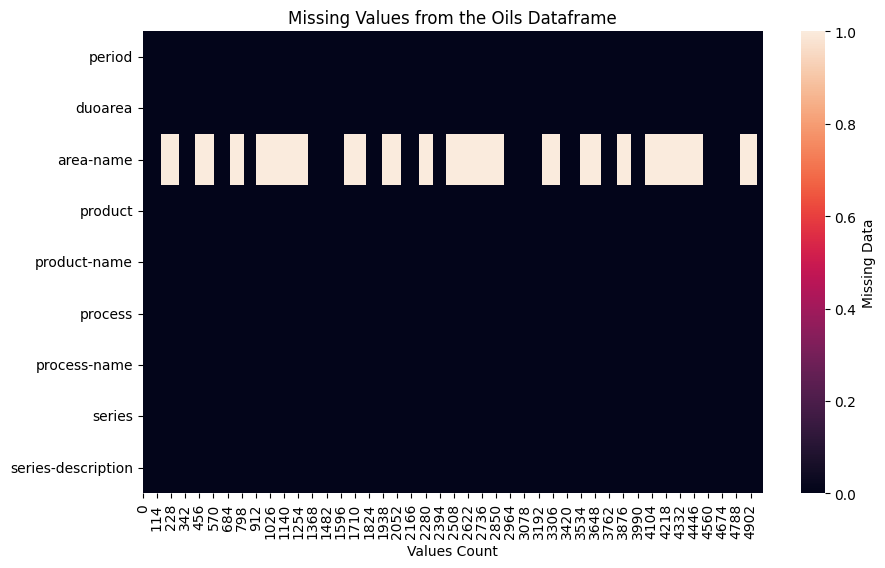

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(oil_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values from the Oils Dataframe')
plt.xlabel('Values Count');

> The only column that has missing values in the oils dataframe is the area-name. It seems to have missing values alongside diffrent dates.

##### *Inspecting the dataframe programmatically*

In [13]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              5000 non-null   object
 1   duoarea             5000 non-null   object
 2   area-name           5000 non-null   object
 3   product             5000 non-null   object
 4   product-name        5000 non-null   object
 5   process             5000 non-null   object
 6   process-name        5000 non-null   object
 7   series              5000 non-null   object
 8   series-description  5000 non-null   object
dtypes: object(9)
memory usage: 351.7+ KB


> The data have 0 to 4999 indices, and all the columns non-null counts are full. However, it was noticed that there are NA values used to presnet the null values.

In [14]:
oil_data.sample(5)

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description
613,2009-04-24,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,PF4,Spot Price FOB,EER_EPMRR_PF4_Y05LA_DPG,Los Angeles Reformulated RBOB Regular Gasoline...
2364,2009-07-10,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PF4,Spot Price FOB,EER_EPD2DXL0_PF4_Y35NY_DPG,New York Harbor Ultra-Low Sulfur No 2 Diesel S...
3195,2020-06-05,Y35NY,NEW YORK CITY,EPD2F,No 2 Fuel Oil / Heating Oil,PF4,Spot Price FOB,EER_EPD2F_PF4_Y35NY_DPG,New York Harbor No. 2 Heating Oil Spot Price F...
4404,2007-11-30,YCUOK,NA,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba..."
4866,2009-07-10,RGC,NA,EPJK,Kerosene-Type Jet Fuel,PF4,Spot Price FOB,EER_EPJK_PF4_RGC_DPG,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Pr...


In [15]:
oil_data.isin(nan).sum()

period                   0
duoarea                  0
area-name             2778
product                  0
product-name             0
process                  0
process-name             0
series                   0
series-description       0
dtype: int64

> In the oil dataset there appears to be 2754 NA values from the area-name column. The other columns doesn't have NA values. However, the duoarea have no missing values.

### Validity (Quality Issue #2):

#### Stocks Dataset

##### *Inspecting the dataframe programmatically*

In [18]:
stocks_data.dtypes

Price      Ticker
Date                 datetime64[ns]
Adj Close  AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Close      AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
High       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Low        AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Open       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Volume     AAPL               int64
          

> The datastypes are all valid. Let's take a look into why For the volume some of the columns have integer values.

In [59]:
int_col= list(stocks_data.dtypes[stocks_data.dtypes == 'int64']['Volume'].index)
for col in int_col:
    print(stocks_data['Volume',col].sample(5))

3173     490294000
3991     136575600
2021    1047625600
4976     262330500
458      295836800
Name: (Volume, AAPL), dtype: int64
4718     49438000
1000    504756000
3039     74472000
1172     88580000
2081    188256000
Name: (Volume, AMZN), dtype: int64
1517    56364300
605     83484600
2177    49592800
4432    29982800
3305    30736500
Name: (Volume, MSFT), dtype: int64


> The dataset is valid in terms of data types.

##### *Inspecting the dataframe visually*
The visualization used to check for datatypes validity is a summary statics table.

In [61]:
## Inspecting the dataframe visually
stocks_data.describe().T

count                           mean                  min  \
Price     Ticker                                                               
Date                5785  2012-07-03 03:47:15.816767488  2001-01-02 00:00:00   
Adj Close AAPL    5785.0                      35.934231             0.198078   
          AMZN    5785.0                      39.459062               0.2985   
          GOOGL   4875.0                      41.868792             2.499884   
          META    2923.0                     157.370234             17.69364   
          MSFT    5785.0                      73.883331            11.263442   
Close     AAPL    5785.0                      37.387745             0.234286   
          AMZN    5785.0                      39.459062               0.2985   
          GOOGL   4875.0                      41.916845             2.502753   
          META    2923.0                      157.69362                17.73   
          MSFT    5785.0                      80.795008                15.15   
High      AAPL    5785.0                      37.768913             0.235536   
          AMZN    5785.0                      39.934441                0.305   
          GOOGL   4875.0                      42.346107             2.546046   
          META    2923.0                     159.668765                18.27   
          MSFT    5785.0                      81.592889                15.62   
Low       AAPL    5785.0                      36.971609             0.227143   
          AMZN    5785.0                      38.963193               0.2755   
          GOOGL   4875.0                      41.468347             2.401401   
          META    2923.0                     155.638686            17.549999   
          MSFT    5785.0                      79.932932                14.87   
Open      AAPL    5785.0                      37.362306             0.231964   
          AMZN    5785.0                      39.468462               0.2955   
          GOOGL   4875.0                      41.906119             2.482232   
          META    2923.0                      157.61935                18.08   
          MSFT    5785.0                       80.76834                 15.2   
Volume    AAPL    5785.0               396258702.402766           24048300.0   
          AMZN    5785.0               119408724.338807           17626000.0   
          GOOGL   4875.0               120162133.221744            9312000.0   
          META    2923.0                30604724.769073            5467500.0   
          MSFT    5785.0                49979496.387208            7425600.0   

                                  25%                  50%  \
Price     Ticker                                             
Date              2006-10-04 00:00:00  2012-07-02 00:00:00   
Adj Close AAPL               2.324391            13.875538   
          AMZN                 2.3935               11.384   
          GOOGL              12.89686            27.058945   
          META              80.604355           153.205185   
          MSFT               18.91785            23.879269   
Close     AAPL               2.749286            16.178928   
          AMZN                 2.3935               11.384   
          GOOGL             12.911662                27.09   
          META              80.769997           153.520004   
          MSFT                  26.98                31.99   
High      AAPL               2.777857            16.346071   
          AMZN                 2.4185               11.546   
          GOOGL             13.043293            27.290501   
          META              81.470001           155.589996   
          MSFT                  27.23            32.299999   
Low       AAPL               2.708214            16.051071   
          AMZN                 2.3345              11.2355   
          GOOGL             12.781281               26.858   
          META              80.154999           151.660004   
          MSFT

#### Oil Dataset

##### *Inspecting the dataframe programmatically*

In [62]:
oil_data.dtypes

period                object
duoarea               object
area-name             object
product               object
product-name          object
process               object
process-name          object
series                object
series-description    object
dtype: object

> All the datatypes in oil data are seen as objects. But as seen in the sample of the data some are dates and bumers.

In [70]:
oil_data.sample(2).T

,1439,1158
period,2015-01-16,2017-08-25
duoarea,Y05LA,RGC
area-name,LOS ANGELES,NA
product,EPD2DC,EPMRU
product-name,Carb Diesel,Conventional Regular Gasoline
process,PF4,PF4
process-name,Spot Price FOB,Spot Price FOB
series,EER_EPD2DC_PF4_Y05LA_DPG,EER_EPMRU_PF4_RGC_DPG
series-description,"Los Angeles, CA Ultra-Low Sulfur CARB Diesel S...",U.S. Gulf Coast Conventional Gasoline Regular ...


> So most of the data here are categorical.

In [67]:
oil_data.nunique()

period                1193
duoarea                  6
area-name                3
product                  9
product-name             9
process                  1
process-name             1
series                  11
series-description      11
dtype: int64

> The date column is named period instead of date. Each of the process and the process-name have only one unique value that is, they don't bring a value to the dataset.

##### *Inspecting the dataframe visually*

In [72]:
oil_data.describe().T

,count,unique,top,freq
period,5000,1193,2016-03-11,9
duoarea,5000,6,RGC,1405
area-name,5000,3,NA,2778
product,5000,9,EPMRU,925
product-name,5000,9,Conventional Regular Gasoline,925
process,5000,1,PF4,5000
process-name,5000,1,Spot Price FOB,5000
series,5000,11,EER_EPD2F_PF4_Y35NY_DPG,603
series-description,5000,11,New York Harbor No. 2 Heating Oil Spot Price F...,603


### Tidiness Issue 1:

#### Stocks Dataset

##### *Inspecting the dataframe programmatically*

##### *Inspecting the dataframe visually*

#### Oil Dataset

##### *Inspecting the dataframe programmatically*

##### *Inspecting the dataframe visually*

### Tidiness Issue 2: 

#### Stocks Dataset

##### *Inspecting the dataframe programmatically*

##### *Inspecting the dataframe visually*

#### Oil Dataset

##### *Inspecting the dataframe programmatically*

##### *Inspecting the dataframe visually*

## 5. Clean data
It's time to address the issues found during assessment to clean and polish your data.

Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [20]:
## Making copies of the datasets to ensure the raw dataframes are not impacted
oil_data_cleaned = oil_data.copy()
stocks_data_cleaned =stocks_data.copy()

### **Quality Issue 1: FILL IN**

In [21]:
# FILL IN - Apply the cleaning strategy

In [22]:
# FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Quality Issue 2: FILL IN**

In [23]:
#FILL IN - Apply the cleaning strategy

In [24]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Tidiness Issue 1: FILL IN**

In [25]:
#FILL IN - Apply the cleaning strategy

In [26]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Tidiness Issue 2: FILL IN**

In [27]:
#FILL IN - Apply the cleaning strategy

In [28]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [29]:
## visualize using the corrleation matrix to check for correlation and feature selections

In [30]:
#FILL IN - Remove unnecessary variables and combine datasets

## 6. Update the data store
In this section, the local database/data store in the directory data are updated with the cleaned data too, with best practices for storing cleaned data:
- Maintained different instances / versions of data (raw and cleaned data)
- Named the dataset files informatively
- Ensure both the raw and cleaned data are saved to the database/data store directory.

> Now the datasets are cleaned they are saved to separete file.

In [31]:
oil_data_cleaned.to_csv('data/oil_data_api_cleaned.csv', index=False) ## store to cvs file

In [32]:
stocks_data_cleaned.to_csv('data/stock_data_cleaned.csv', index=False) ## store to cvs file

## 7. Research

### **7.1:** Oil Prices and Big Tech. Stocks 
In this section the cleaned data copies are reloaded and used to answer the question raised.

*Research question:* 

How does the stocks of the big Tech. Companies such as Google and Amazon, META and Micorsoft and prices of oils changes or correlates in the same year?

In [73]:
## Visual 1 - FILL IN
## Plotting the corrleation matrix

*Answer to research question:* FILL IN

In [34]:
## Visual 2 - FILL IN
## Visualizing the stocks and oils as a time line for comparison

*Answer to research question:* FILL IN

### **7.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN